In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from gtts import gTTS
from wonderwords import RandomSentence
import librosa
import numpy as np
from IPython.display import Audio

In [2]:
language = 'en'
google_filepath = "../data/vox1_indian/id10000/GoogleSamples/"
for i in range(200):
    s = RandomSentence()
    s = s.sentence().lower().strip("the .") + " " + s.sentence().lower().strip("the .") + " " + s.sentence().lower().strip("the ")
    tts = gTTS(text=s, lang=language, slow=False) 
    tts.save(google_filepath + "temp.wav")

    y, sr = librosa.load(google_filepath + "temp.wav")
    y = y + max(y)*0.002*np.random.normal(-1, 1, len(y))
    librosa.audio.sf.write(google_filepath + f"{i:05d}.wav", y, sr)

os.remove(google_filepath + "temp.wav")

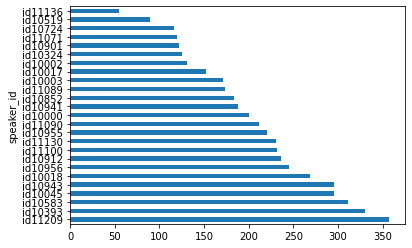

In [3]:
df = pd.DataFrame([], columns=["speaker_id", "filepath"])
root = r"..\data\vox1_indian"
for x in os.scandir(root):
    if x.is_dir():
        for y in os.scandir(x):
            for z in os.scandir(y):
                df.loc[len(df)] = [x.name, z.path]

df.value_counts("speaker_id").plot(kind="barh")
plt.show()

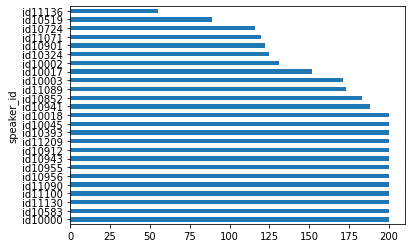

In [4]:
grps = df.groupby("speaker_id")
df = pd.DataFrame([], columns=["speaker_id", "filepath"])
for x, y in grps:
    df = pd.concat([df, y.sample(frac=1)[:200]], ignore_index=True)

df.value_counts("speaker_id").plot(kind="barh")
plt.show()

In [5]:
df.to_csv("../data/voice_data.csv", index=False)